In [42]:
import numpy as np
import struct
import matplotlib.pyplot as plt

# 训练集文件
train_images_idx3_ubyte_file = 'MNIST_data/train-images-idx3-ubyte'
# 训练集标签文件
train_labels_idx1_ubyte_file = 'MNIST_data/train-labels-idx1-ubyte'

# 测试集文件
test_images_idx3_ubyte_file = 'MNIST_data/t10k-images-idx3-ubyte'
# 测试集标签文件
test_labels_idx1_ubyte_file = 'MNIST_data/t10k-labels-idx1-ubyte'


def decode_idx3_ubyte(idx3_ubyte_file):
    """
    解析idx3文件的通用函数
    :param idx3_ubyte_file: idx3文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx3_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数、图片数量、每张图片高、每张图片宽
    offset = 0
    fmt_header = '>iiii' #因为数据结构中前4行的数据类型都是32位整型，所以采用i格式，但我们需要读取前4行数据，所以需要4个i。我们后面会看到标签集中，只使用2个ii。
    magic_number, num_images, num_rows, num_cols = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张, 图片大小: %d*%d' % (magic_number, num_images, num_rows, num_cols))

    # 解析数据集
    image_size = num_rows * num_cols
    offset += struct.calcsize(fmt_header)  #获得数据在缓存中的指针位置，从前面介绍的数据结构可以看出，读取了前4行之后，指针位置（即偏移位置offset）指向0016。
    print(offset)
    fmt_image = '>' + str(image_size) + 'B'  #图像数据像素值的类型为unsigned char型，对应的format格式为B。这里还有加上图像大小784，是为了读取784个B格式数据，如果没有则只会读取一个值（即一副图像中的一个像素值）
    print(fmt_image,offset,struct.calcsize(fmt_image))
    images = np.empty((num_images, num_rows, num_cols))
    #plt.figure()
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print('已解析 %d' % (i + 1) + '张')
            print(offset)
        images[i] = np.array(struct.unpack_from(fmt_image, bin_data, offset)).reshape((num_rows, num_cols))
        #print(images[i])
        offset += struct.calcsize(fmt_image)
#        plt.imshow(images[i],'gray')
#        plt.pause(0.00001)
#        plt.show()
    #plt.show()

    return images


def decode_idx1_ubyte(idx1_ubyte_file):
    """
    解析idx1文件的通用函数
    :param idx1_ubyte_file: idx1文件路径
    :return: 数据集
    """
    # 读取二进制数据
    bin_data = open(idx1_ubyte_file, 'rb').read()

    # 解析文件头信息，依次为魔数和标签数
    offset = 0
    fmt_header = '>ii'
    magic_number, num_images = struct.unpack_from(fmt_header, bin_data, offset)
    print('魔数:%d, 图片数量: %d张' % (magic_number, num_images))

    # 解析数据集
    offset += struct.calcsize(fmt_header)
    fmt_image = '>B'
    labels = np.empty(num_images)
    for i in range(num_images):
        if (i + 1) % 10000 == 0:
            print ('已解析 %d' % (i + 1) + '张')
        labels[i] = struct.unpack_from(fmt_image, bin_data, offset)[0]
        offset += struct.calcsize(fmt_image)
    return labels


def load_train_images(idx_ubyte_file=train_images_idx3_ubyte_file):
    """
    TRAINING SET IMAGE FILE (train-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  60000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_train_labels(idx_ubyte_file=train_labels_idx1_ubyte_file):
    """
    TRAINING SET LABEL FILE (train-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  60000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)


def load_test_images(idx_ubyte_file=test_images_idx3_ubyte_file):
    """
    TEST SET IMAGE FILE (t10k-images-idx3-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000803(2051) magic number
    0004     32 bit integer  10000            number of images
    0008     32 bit integer  28               number of rows
    0012     32 bit integer  28               number of columns
    0016     unsigned byte   ??               pixel
    0017     unsigned byte   ??               pixel
    ........
    xxxx     unsigned byte   ??               pixel
    Pixels are organized row-wise. Pixel values are 0 to 255. 0 means background (white), 255 means foreground (black).

    :param idx_ubyte_file: idx文件路径
    :return: n*row*col维np.array对象，n为图片数量
    """
    return decode_idx3_ubyte(idx_ubyte_file)


def load_test_labels(idx_ubyte_file=test_labels_idx1_ubyte_file):
    """
    TEST SET LABEL FILE (t10k-labels-idx1-ubyte):
    [offset] [type]          [value]          [description]
    0000     32 bit integer  0x00000801(2049) magic number (MSB first)
    0004     32 bit integer  10000            number of items
    0008     unsigned byte   ??               label
    0009     unsigned byte   ??               label
    ........
    xxxx     unsigned byte   ??               label
    The labels values are 0 to 9.

    :param idx_ubyte_file: idx文件路径
    :return: n*1维np.array对象，n为图片数量
    """
    return decode_idx1_ubyte(idx_ubyte_file)



魔数:2051, 图片数量: 60000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
已解析 20000张
15679232
已解析 30000张
23519232
已解析 40000张
31359232
已解析 50000张
39199232
已解析 60000张
47039232
魔数:2049, 图片数量: 60000张
已解析 10000张
已解析 20000张
已解析 30000张
已解析 40000张
已解析 50000张
已解析 60000张
魔数:2051, 图片数量: 10000张, 图片大小: 28*28
16
>784B 16 784
已解析 10000张
7839232
魔数:2049, 图片数量: 10000张
已解析 10000张
5.0


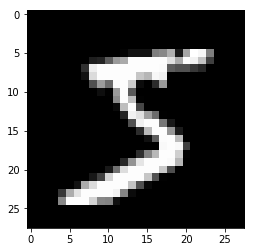

0.0


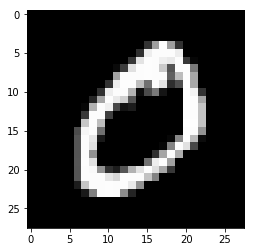

4.0


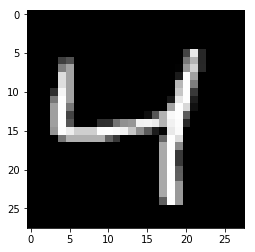

1.0


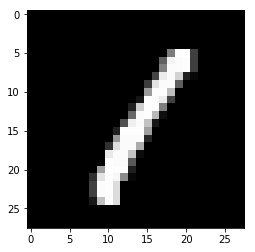

9.0


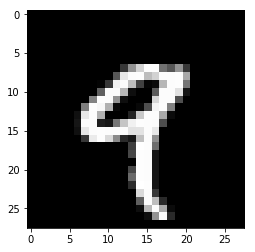

2.0


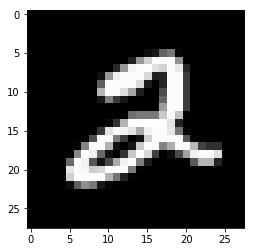

1.0


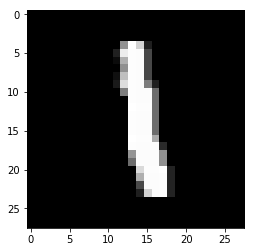

3.0


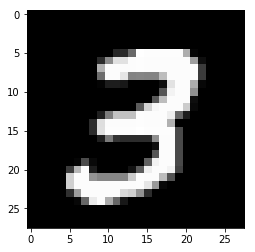

1.0


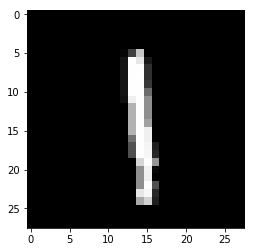

4.0


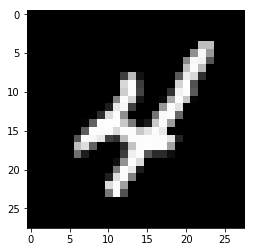

7.0


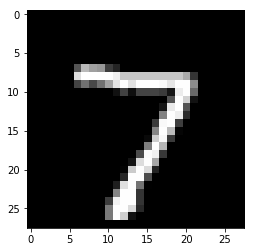

2.0


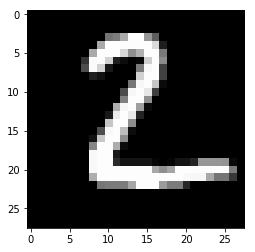

1.0


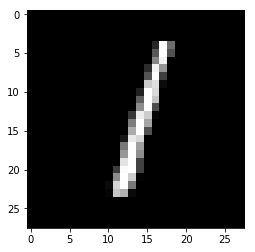

0.0


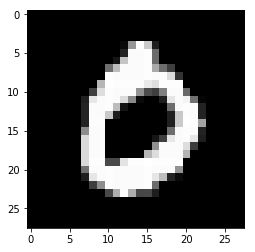

4.0


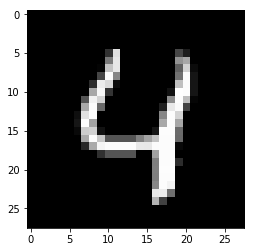

1.0


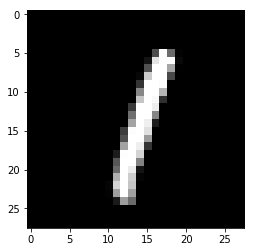

4.0


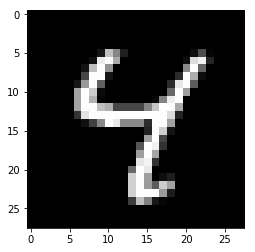

9.0


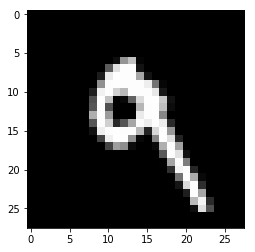

5.0


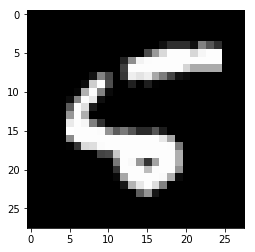

9.0


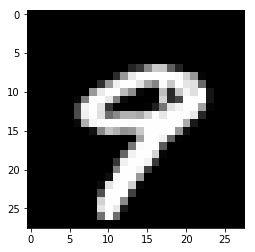

done


In [43]:
train_images = load_train_images()

train_labels = load_train_labels()
test_images = load_test_images()
test_labels = load_test_labels()

# 查看前十个数据及其标签以读取是否正确
for i in range(10):
    print(train_labels[i])
    plt.imshow(train_images[i], cmap='gray')
    plt.pause(0.000001)
    plt.show()
    
for i in range(10):
    print(test_labels[i])
    plt.imshow(test_images[i], cmap = 'gray')
    plt.pause(0.000001)
    plt.show()

print('done')



In [44]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [45]:
# Bind images and labels, preparing to sort
train_list = []
for i in range(len(train_images)):
    train_list.append((train_images[i], int(train_labels[i])))

print(len(train_list))

# for i in range(20):
#     print(train_list[i][1])
#     plt.imshow(train_list[i][0], cmap = 'gray')
#     plt.pause(0.00001)
#     plt.show()

60000


In [46]:
# Sort train_list by the labels

train_list.sort(key = lambda x : x[1])

# for i in range(1, len(train_list), 5001):
#     print(train_list[i][1])
#     plt.imshow(train_list[i][0], cmap = 'gray')
#     plt.pause(0.00001)
#     plt.show()

1


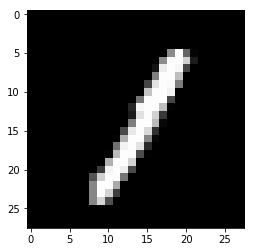

1


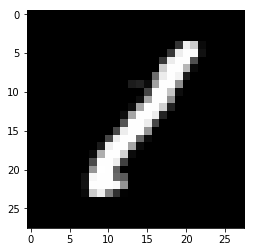

2


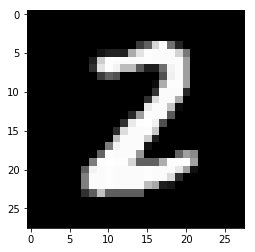

3


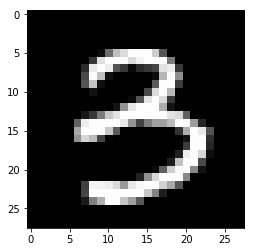

4


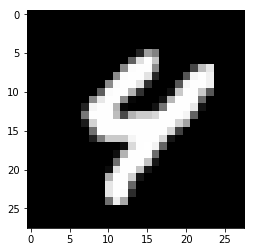

5


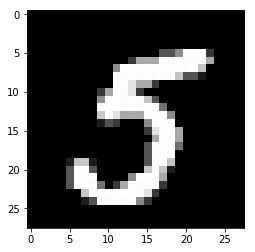

7


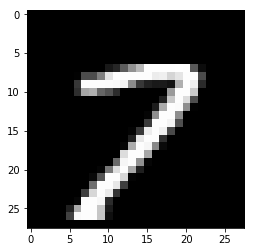

7


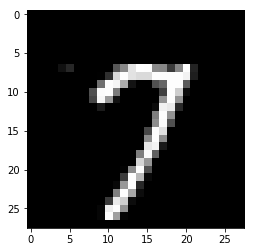

8


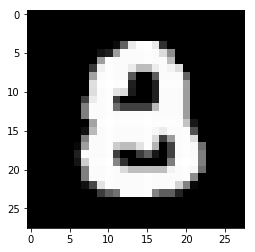

9


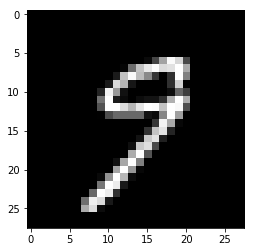

In [47]:
# Divide data into groups

clients_num = 10
group_size = len(train_list) // clients_num

train_group = []
train_labels_group = []

for i in range(clients_num):
    train_tmp = []
    label_tmp = []
    
    for j in range(i * group_size, (i + 1) * group_size):
        train_tmp.append(train_list[j][0])
        label_tmp.append(train_list[j][1])
    
    train_group.append(train_tmp)
    train_labels_group.append(label_tmp)

for i in range(len(train_group)):
    # Labels
    print(train_labels_group[i][-1])
    plt.imshow(train_group[i][-1], cmap = 'gray')
    plt.pause(0.00001)

    plt.show()

In [48]:
# print(train_labels_group[-1][-1])
# print(int(train_labels_group[-1][-1]))
b = np.array(train_labels_group)
# print(b[-1][-1])
print(b.dtype)
# b.dtype = 'int64'
# print(b[-1][-1])


int64


In [49]:
train_group = np.array(train_group)
train_labels_group = np.array(train_labels_group)

print(train_group.shape)
print(train_labels_group.shape)

# Modify to numpy image
# Add "Channel" dimension

train_group = train_group[:, :, :, :, np.newaxis]

print(train_group.shape)


(10, 6000, 28, 28)
(10, 6000)
(10, 6000, 28, 28, 1)


In [20]:
# print(train_group[-1][0])

In [9]:
# Change labels to one hot array

# tmp = np.zeros((train_labels_group.shape[0], train_labels_group.shape[1], 10))
# for i in range(train_labels_group.shape[0]):
#     for j in range(train_labels_group.shape[1]):
#         tmp[i][j][int(train_labels_group[i][j])] = 1
# train_labels_group = tmp
# print(tmp.shape)
# print(tmp)


In [50]:
# Check dtype
print(train_group.dtype)
print(train_labels_group.dtype)

# Label should be int64


float64
int64
int64
8


In [51]:
# Pickle files
import pickle
for i in range(len(train_group)):
    with open('MNIST_data/train_data-' + str(i), 'wb') as train_file:
        pickle.dump(train_group[i], train_file)
    
    with open('MNIST_data/train_label-' + str(i), 'wb') as train_label_file:
        pickle.dump(train_labels_group[i], train_label_file)


In [ ]:
# Loading pickle tests
import pickle
with open('MNIST_data/train_data-' + str(9), 'rb') as train_file:
    train_data = pickle.load(train_file)
with open('MNIST_data/train_label-' + str(9), 'rb') as label_file:
    label_data = pickle.load(label_file)


# This test is only valid for data without the "channel" dimension

# for i in range(len(train_data)):
#     # Labels
#     print(label_data[i])
#     plt.imshow(train_data[i], cmap = 'gray')
#     plt.pause(0.00001)

#     plt.show()

In [ ]:
print(label_data)